In [2]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.2 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 1. Import Data

In [2]:
df = pd.read_csv('data/temporalidad_2.csv')

In [3]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,anio,0.481817,0.301597,-0.590646,0.999993,0.506429,0.265076,-0.525747,0.999976,0.519853,...,0.002925,0.0,0.534162,0.263700,0.016606,0.0,0.538714,0.258956,0.016948,0.0
1,anio,0.482938,0.305553,-0.577721,0.999993,0.506921,0.266397,-0.512118,0.999976,0.520104,...,0.002954,0.0,0.535947,0.262976,0.017162,0.0,0.540259,0.258864,0.017491,0.0
2,anio,0.484024,0.310178,-0.572818,0.999993,0.507480,0.269182,-0.505942,0.999975,0.520388,...,0.003134,0.0,0.536216,0.265010,0.017133,0.0,0.540648,0.260463,0.017502,0.0
3,anio,0.485636,0.312715,-0.565746,0.999993,0.508270,0.270935,-0.496840,0.999975,0.521056,...,0.003516,0.0,0.538165,0.266416,0.017650,0.0,0.542703,0.261427,0.018102,0.0
4,anio,0.486848,0.315151,-0.587266,0.999993,0.509177,0.272623,-0.518561,0.999975,0.521848,...,0.003250,0.0,0.539277,0.264881,0.017491,0.0,0.543666,0.260675,0.017829,0.0


In [4]:
df['class'].unique()

array(['anio', 'mes', 'aveces'], dtype=object)

In [5]:
print(df.isnull().sum())  # Null value

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v500     0
x501     0
y501     0
z501     0
v501     0
Length: 2005, dtype: int64


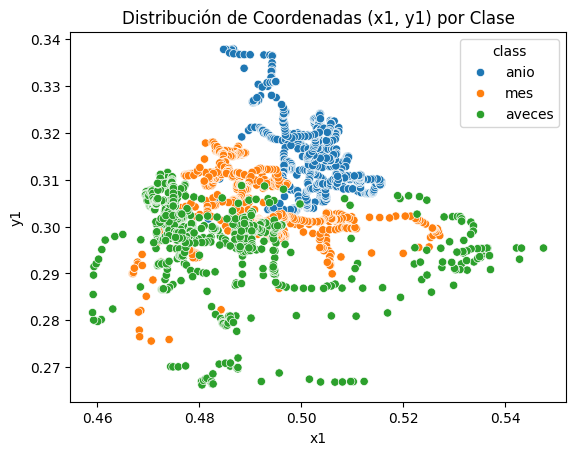

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for landmark (x1, y1)
sns.scatterplot(data=df, x='x1', y='y1', hue='class')
plt.title('Distribución de Coordenadas (x1, y1) por Clase')
plt.show()


# 2. Balancing the data

In [10]:
# Balancing the data
oversampler = RandomOverSampler(sampling_strategy={'anio': 4000, 'mes': 4000, 'aveces': 4000})


In [11]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [12]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [13]:
print(y_resampled.value_counts())

class
anio      4000
mes       4000
aveces    4000
Name: count, dtype: int64


# 3. Divide data into training and test

In [14]:
from sklearn.model_selection import train_test_split

# Divide data into training and test, keeping the ratio of classes with stratify
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [15]:
print(y_train.value_counts())

class
mes       2800
aveces    2800
anio      2800
Name: count, dtype: int64


In [16]:
print(X_train.isnull().sum())

x1      0
y1      0
z1      0
v1      0
x2      0
       ..
v500    0
x501    0
y501    0
z501    0
v501    0
Length: 2004, dtype: int64


In [17]:
print(y_train.isnull().sum())

0


In [18]:
print(X_train.dtypes)

x1      float64
y1      float64
z1      float64
v1      float64
x2      float64
         ...   
v500    float64
x501    float64
y501    float64
z501    float64
v501    float64
Length: 2004, dtype: object


In [19]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
9865,0.486647,0.305558,-0.545874,0.999997,0.512494,0.264268,-0.483564,0.999983,0.524709,0.267010,...,0.004054,0.0,0.530683,0.249056,0.019438,0.0,0.534936,0.245352,0.019873,0.0
7536,0.484749,0.279259,-0.567946,1.000000,0.506410,0.241200,-0.513860,1.000000,0.519473,0.245836,...,0.006839,0.0,0.535036,0.240007,0.023233,0.0,0.539741,0.236785,0.023893,0.0
4533,0.496335,0.318383,-0.624667,0.999992,0.519047,0.276031,-0.563125,0.999976,0.531859,0.279099,...,0.001354,0.0,0.544348,0.261996,0.014864,0.0,0.548608,0.258566,0.014951,0.0
8832,0.498715,0.301539,-0.479683,0.999999,0.523199,0.250836,-0.415656,0.999992,0.536617,0.252288,...,0.003637,0.0,0.544647,0.249795,0.019103,0.0,0.549429,0.244030,0.019867,0.0
824,0.481577,0.308688,-0.571485,0.999997,0.506954,0.263630,-0.519798,0.999986,0.520191,0.265179,...,0.004540,0.0,0.535385,0.259587,0.020180,0.0,0.539705,0.255616,0.020705,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0.502434,0.316695,-0.633616,0.999966,0.525307,0.280355,-0.572379,0.999922,0.536678,0.283072,...,0.002711,0.0,0.547454,0.269898,0.017531,0.0,0.551511,0.266773,0.017879,0.0
7601,0.476867,0.293372,-0.581677,1.000000,0.503242,0.252524,-0.526882,1.000000,0.516510,0.255681,...,0.005243,0.0,0.530882,0.243097,0.020514,0.0,0.535875,0.237966,0.021277,0.0
10322,0.482789,0.311617,-0.508989,0.999996,0.508188,0.267003,-0.453377,0.999982,0.521349,0.269216,...,0.005032,0.0,0.536674,0.263623,0.020482,0.0,0.541326,0.258596,0.021172,0.0
3481,0.505867,0.322365,-0.561695,0.999847,0.526595,0.280856,-0.496800,0.999699,0.538674,0.283327,...,0.002831,0.0,0.544870,0.273078,0.017642,0.0,0.548854,0.269976,0.018017,0.0


In [20]:
y_train

9865        mes
7536     aveces
4533       anio
8832        mes
824         mes
          ...  
3687       anio
7601     aveces
10322       mes
3481       anio
9785        mes
Name: class, Length: 8400, dtype: object

# 4. Train models

In [21]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

In [22]:
pipelines = {
    'lr':make_pipeline(LogisticRegression(max_iter=500)),
    'rc':make_pipeline(RidgeClassifier()),
    'rf':make_pipeline(RandomForestClassifier()),
    #'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    #'svm':make_pipeline(StandardScaler(), SVC())
}

In [23]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf'])

### 4.1 Hiperparametros

In [24]:
param_grids = {
    'lr': {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'rc': {'ridgeclassifier__alpha': [0.1, 1.0, 10.0]},
    'rf': {'randomforestclassifier__n_estimators': [50, 100, 200],
           'randomforestclassifier__max_depth': [None, 10, 20],
           'randomforestclassifier__min_samples_split': [2, 5],
           'randomforestclassifier__min_samples_leaf': [1, 2],
           'randomforestclassifier__max_features': ['sqrt', 'log2']}
}


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.simplefilter("ignore")

# Perform grid search with cross-validation for each model
best_models = {}
for key, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[key], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[key] = grid_search.best_estimator_
    print(f"Mejores parámetros para {key}: {grid_search.best_params_}")
    print(f"Precisión media de validación cruzada para {key}: {grid_search.best_score_}")


Mejores parámetros para lr: {'logisticregression__C': 1}
Precisión media de validación cruzada para lr: 1.0
Mejores parámetros para rc: {'ridgeclassifier__alpha': 0.1}
Precisión media de validación cruzada para rc: 1.0
Mejores parámetros para rf: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Precisión media de validación cruzada para rf: 1.0


In [26]:
# Train the best models on the entire training set and evaluate on the test set
fit_models = {}
predictions = {}
for key, model in best_models.items():
    y_pred = model.predict(X_test)
    fit_models[key] = model
    predictions[key] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión en el conjunto de prueba para {key}: {accuracy}")


Precisión en el conjunto de prueba para lr: 1.0
Precisión en el conjunto de prueba para rc: 1.0
Precisión en el conjunto de prueba para rf: 1.0


In [27]:
predictions

{'lr': array(['anio', 'anio', 'anio', ..., 'anio', 'mes', 'anio'], dtype=object),
 'rc': array(['anio', 'anio', 'anio', ..., 'anio', 'mes', 'anio'], dtype='<U6'),
 'rf': array(['anio', 'anio', 'anio', ..., 'anio', 'mes', 'anio'], dtype=object)}

# 5. Evaluate models

In [28]:
# Calculate accuracy, precision y recall for each model
evaluations = {}
for clave_model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Usamos output_dict=True para guardar los datos en formato diccionario
    evaluations[clave_model] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall']
    }

# Mostrar resultados
for clave_model, metrics in evaluations.items():
    print(f"Modelo: {clave_model}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precisión (weighted avg): {metrics['precision']}")
    print(f"Recall (weighted avg): {metrics['recall']}\n")


Modelo: lr
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rc
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rf
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0



## 5.3 Matriz de confusión

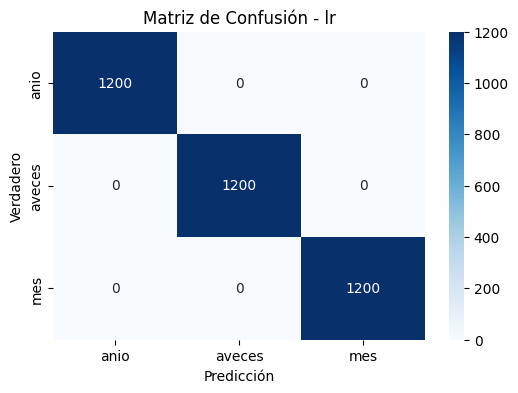

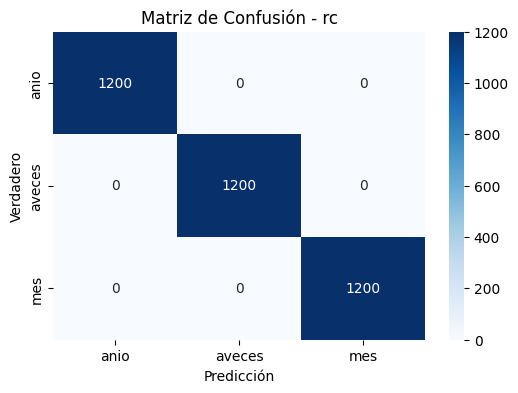

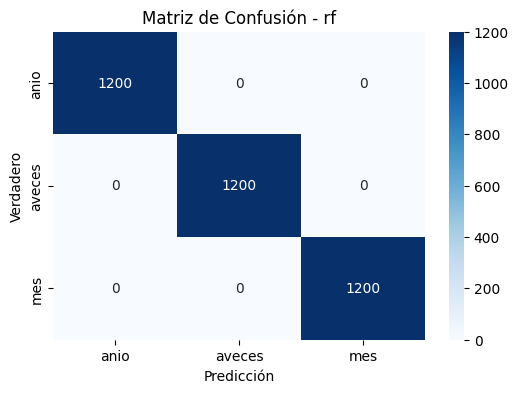

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las matrices de confusión y visualizarlas
for clave_model, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {clave_model}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


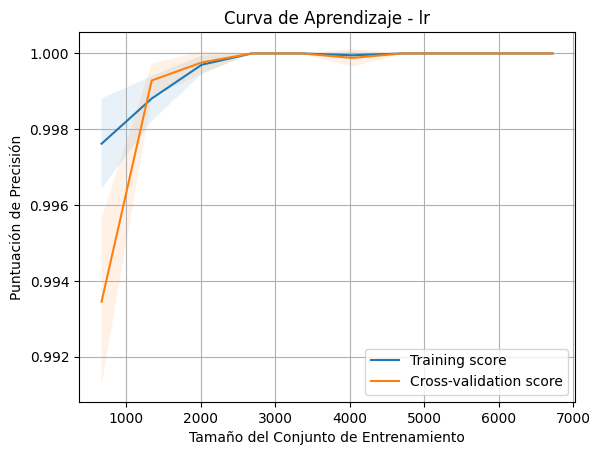

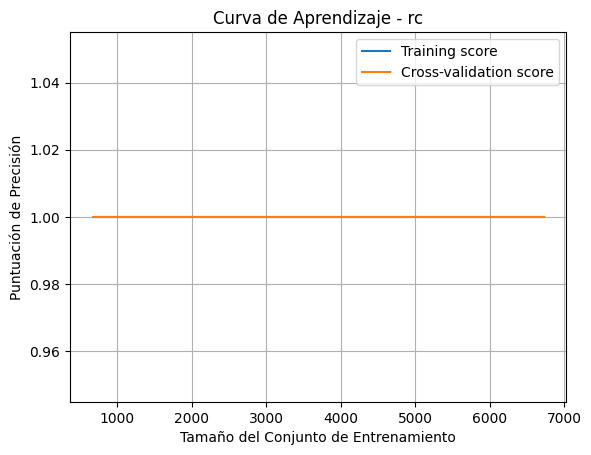

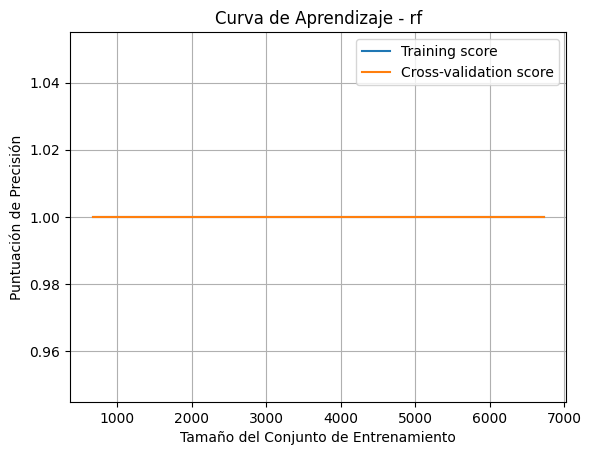

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


## Save model

In [31]:
import pickle
# Guardar el modelo ya entrenado
with open('models_2/temporalidad_2_hip.pkl', 'wb') as f: 
    pickle.dump(fit_models['lr'], f) 

## Load Model

In [1]:
import mediapipe as mp
import cv2 
import numpy as np
import pandas as pd
import pickle 
from collections import defaultdict
import warnings

In [2]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

In [3]:
with open('models_2/temporalidad_1_hip.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.6) as holistic:
    warnings.simplefilter("ignore")
    
    class_counts = defaultdict(int)
    max_prob_dict = defaultdict(float)
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
        
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            class_counts[body_language_class] += 1
            body_language_prob = model.predict_proba(X)[0]

            
            #print(body_language_class, body_language_prob)


            max_prob_value = np.max(body_language_prob)
            if max_prob_value > max_prob_dict.get(body_language_class, 0):
                max_prob_dict[body_language_class] = max_prob_value
            
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, ''
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, ''
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except:
            pass
                        
        cv2.imshow('Rosa Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            if class_counts:
                print("Class Counts:")
                for cls, count in class_counts.items():
                    print(f"{cls}: {count}")
            
                # Frequent class
                most_frequent_class = max(class_counts, key=class_counts.get, default="Unknown")
                print(f"Most Frequent Class: {most_frequent_class} ({class_counts[most_frequent_class]})")
                
                # Print the total number of classes
                print(f"Total Unique Classes Detected: {len(class_counts)}")
                
                # Print the maximum probability and its associated class
                if max_prob_dict:
                    print("Max Probability for Each Class:")
                    for cls, prob in max_prob_dict.items():
                        print(f"{cls}: {prob:.2f}")
                #else:
                #    print("No valid class detected.")

            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Class Counts:
hoy: 66
ayer: 110
dia: 64
Most Frequent Class: ayer (110)
Total Unique Classes Detected: 3
Max Probability for Each Class:
hoy: 0.87
ayer: 0.86
dia: 0.77


: 